# Data Analyst Associate Case Study Submission

## Company Background
Vivendo is a fast food chain in Brazil with over 200 outlets. As with many fast food
establishments, customers make claims against the company. For example, they blame
Vivendo for suspected food poisoning.

The legal team, who processes these claims, is currently split across four locations. The new head of the legal department wants to see if there are differences in the time it takes to close claims across the locations.

## Data Validation
Describe the validation tasks you performed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

Our first step will be to validate and clean the dataset to gather.

To do this we will import the modules that we will use to anaylze the data and load in the dataset

We will then take a first look at the data complete 

In [1]:
# import the packages that we will use in the project
import pandas as pd
import re
import matplotlib as plt
import seaborn as sns

# load in the dataset
claims = pd.read_csv('claims.csv')

# view the first couple rows of the data
claims.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


Next we will dive deeper into the data to get a better idea of how large the data is and the data types of for each column.

In [2]:
# data types of for each column
print(claims.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB
None
(98, 8)


From the output we can get the following ideas about the data:

- We see that the data set contains 98 rows and has 8 columns
- This dataset contains the correct variable names
- One that stands out the "Claim Amount" column as it is type object when it should be numeric

Our next step will be to validate each column to ensure that it aligns with the with the stated criteria.

### Claim ID

As the "Claim ID" column is a character variable with unique identifier that follows a set format. To validate we must ensure the follow

- Must be character type
- Rows must be unique
- Must not contains NA values 
- Must follow specific format like "0000000-00.2010.0.00.0094"

In [3]:
# What dtype is this col
claim_ID_dtype = claims["Claim ID"].dtypes

# How many rows unique
claim_ID_unique = len(claims["Claim ID"].unique())

# How many NA rows
claim_ID_emptyrow = len(claims[claims["Claim ID"].isna()])

# How many rows are formatted correctly
m1 = claims["Claim ID"].str.contains("[0-9]+-[0-9]+\.[0-9]+\.\d\.[0-9]+\.[0-9]+", na=False)
claim_ID_error = len(claims[~m1])

print("The Claim ID is type:", claim_ID_dtype)
print("Number of unique rows:",claim_ID_unique)
print("Number of empty rows:",claim_ID_emptyrow)
print("Number of formatting errors:",claim_ID_error)

The Claim ID is type: object
Number of unique rows: 98
Number of empty rows: 0
Number of formatting errors: 0


After running various checks we can confirm the following: 

- Column data type is object as expected
- We also can confirm that all values are unique
- The column contains no NA values
- All values conform to the expected format

From the following checks we can confirm that that column "Claim ID" requires no further cleaning and conforms to the data dictionary description

### Time to Close

As the "Time to Closs" column is a numeric variable that describes number of days taken for claim to close. To validate we must ensure the follow

- Must be numeric type
- Must not contains NA values 
- Must be postive value as number of days cannot logically be less that 0

In [4]:
# What dtype is this col
time_to_close_dtype = claims["Time to Close"].dtypes

# How many NA rows
time_to_close_emptyrow = len(claims[claims["Time to Close"].isna()])

# Find minimum/maximum
time_to_close_max = claims["Time to Close"].max()
time_to_close_min = claims["Time to Close"].min()

# print results of analysis
print("The Claim ID is type:", time_to_close_dtype)
print("Number of NA values:", time_to_close_emptyrow)
print("Number of rows less that 0:", len(claims[claims["Time to Close"] < 0]))


The Claim ID is type: int64
Number of NA values: 0
Number of rows less that 0: 1


After running various checks we can confirm the following: 

- Column data type int64 is object as expected
- The column contains no NA values
- We notice that there is one values less than 0

From the following checks we can can see that the "Time to Close" columns contains one value that is less then 0 which requires further investigation.

In [5]:
#Identify row where "Time to Close" is less that 0
print(claims[claims["Time to Close"] < 0])


                     Claim ID  Time to Close Claim Amount  Amount Paid  \
58  0000000-00.2019.0.00.0079            -57   R$3,672.00       999.68   

    Location  Individuals on Claim  Linked Cases Cause  
58  SAO LUIS                     0         False   NaN  


From printing out the row that has as "Time to close" of less that 0 we find that 1 row contains a row with a negative value of -57. This row is located at index 58.

As we want to maintain the all rows in this dataset we will treat this row as an data entry error and convert this to a postive integer.

In [6]:
# drop row that have less than 0
claims["Time to Close"] = claims["Time to Close"].replace([-57], 57)

# validate cleaning step
print(claims.iloc[58])
print("Number of rows", len(claims))
print("Number of rows less that 0:", len(claims[claims["Time to Close"] < 0]))

Claim ID                0000000-00.2019.0.00.0079
Time to Close                                  57
Claim Amount                           R$3,672.00
Amount Paid                                999.68
Location                                 SAO LUIS
Individuals on Claim                            0
Linked Cases                                False
Cause                                         NaN
Name: 58, dtype: object
Number of rows 98
Number of rows less that 0: 0


From the output we see that the corrections made have corrected the row at issue. The "Time to Close" column no longer has any rows with values less than 0 and we have not lost any data.

### Claim Amount

As the "Claim Amount" column is a numeric value that describes initial claim value in the currency of Brazil.
To validate/clean we must ensure the following

- Must be numeric type
- Must not contains NA values
- Must be be equal to or greater than 0
- Must be in correct format. for example “R$50,000.00” should be converted into 50000.


In [7]:
# find value types and how many NA rows 
print("The Claim Amount column are type:", claims["Claim Amount"].dtypes)
print("Number of empty rows:", len(claims[claims["Claim Amount"].isna()]))
print(claims["Claim Amount"].head())

The Claim Amount column are type: object
Number of empty rows: 0
0     R$50,000.00
1    R$180,000.00
2     R$70,000.00
3     R$95,104.00
4     R$29,000.00
Name: Claim Amount, dtype: object


After running various checks we can confirm the following: 

- Column data type is object or string
- The column contains no NA values
- The columns are formated incorrectly

To correct this column we must remove 'R$' and ',' from the string and convert the values to numerics 

In [8]:
# remove "R$" and "," and convert to int
claims["Claim Amount"] = claims["Claim Amount"].replace("[R$,]", "", regex=True)
claims["Claim Amount"] = pd.to_numeric(claims["Claim Amount"])

# validate cleaning step
print("The Claim Amount column are type:", claims["Claim Amount"].dtypes)
print("Number of rows = or less than 0:", len(claims[claims["Claim Amount"] <= 0]))
print("Number of rows", len(claims))
print(claims["Claim Amount"].head())


The Claim Amount column are type: float64
Number of rows = or less than 0: 0
Number of rows 98
0     50000.0
1    180000.0
2     70000.0
3     95104.0
4     29000.0
Name: Claim Amount, dtype: float64


After running  or final checks we can confirm the following: 

- Column data type is now numeric
- The column contains no NA values
- The column contains no values less than 0
- The columns are formated correctly
- No rows were lost in the process

Following these checks we can confirm that columns "Claim amount" has been cleaned and is ready for anaylsis.


### Amount Paid

As the "Amount Paid" column is a numeric value that describes total amount paid after the claim closed in the currency of Brazil.
To validate/clean we must ensure the following

- Must be numeric type
- Must not contains NA values
- Must be be equal to or greater than 0

In [9]:
# What dtype is this col
amount_paid_dtype = claims["Amount Paid"].dtypes

# How many NA rows
amount_paid_emptyrow = len(claims[claims["Amount Paid"].isna()])


# print results of analysis
print("The Amount Paid column are type:", claims["Amount Paid"].dtypes)
print("Number of empty rows:", len(claims[claims["Amount Paid"].isna()]))
print("Number of rows = or less than 0:", len(claims[claims["Amount Paid"] <= 0]))

The Amount Paid column are type: float64
Number of empty rows: 0
Number of rows = or less than 0: 0


After running or final checks we can confirm the following: 

- Column data type is now numeric
- The column contains no NA values
- The column contains no values less than 0


Following these checks we can confirm that column "Amount Paid" has been clean and is ready for anaylsis.

### Location

As the "Location" column must contain a character value that describes the location of the claim and should be one of “RECIFE”, “SAO LUIS”, “FORTALEZA”, or “NATAL”.
To validate/clean we must ensure the following

- Must be object type
- Must not contains NA values
- Must be either “RECIFE”, “SAO LUIS”, “FORTALEZA”, or “NATAL”

In [10]:
# Validity Checks
# Check columns data type
print("The Amount Paid column are type:", claims["Location"].dtypes)
# Check if any NA values
print("Number of empty rows:", len(claims[claims["Location"].isna()]))
# Check the values that are present
print(claims["Location"].value_counts())

The Amount Paid column are type: object
Number of empty rows: 0
SAO LUIS     30
RECIFE       25
FORTALEZA    22
NATAL        21
Name: Location, dtype: int64


After running our checks we can confirm the follwing:

- Column is type object
- Contains no NA values
- All values are either “RECIFE”, “SAO LUIS”, “FORTALEZA”, or “NATAL”

Following these checks we can confirm that column "Location" has been clean and is ready for anaylsis.

### Individuals on Claims

As the "Individuals on Claim" column must contain a numeric value that describes the number of individuals on each claim.
To validate/clean we must ensure the following

- Must be numeric type
- Must not contains NA values
- Must be greater than 0

In [11]:
# Validity Checks
# Check columns data type
print("The Amount Paid column are type:", claims["Individuals on Claim"].dtypes)
# Check if any NA values
print("Number of empty rows:", len(claims[claims["Individuals on Claim"].isna()]))
# Check if any rows are less than 0
print("Number of rows = or less than 0:", len(claims[claims["Individuals on Claim"] <= 0]))


The Amount Paid column are type: int64
Number of empty rows: 0
Number of rows = or less than 0: 7


After running validity checks we can confirm the following: 

- Column data type is numeric
- The column contains no NA values
- The columns contains 7 rows that are less than 0

To correct this column we see what the rows that contain less than 0 are.

In [12]:
# print rows where "Individuals on Claim" is less than 0
print(claims[claims["Individuals on Claim"] <= 0])

                     Claim ID  Time to Close  Claim Amount  Amount Paid  \
14  0000000-00.2016.0.00.0083           1823       16789.0      5227.91   
38  0000000-00.2018.0.00.0003            925        3841.0      1324.24   
41  0000000-00.2018.0.00.0040            997        8401.0      5394.85   
53  0000000-00.2019.0.00.0001            659       10428.0      1722.04   
57  0000000-00.2019.0.00.0078            495        6691.0      4154.22   
58  0000000-00.2019.0.00.0079             57        3672.0       999.68   
84  0000000-00.2020.0.00.0064            272        3555.0      1013.36   

     Location  Individuals on Claim  Linked Cases Cause  
14   SAO LUIS                     0         False   NaN  
38     RECIFE                     0         False   NaN  
41      NATAL                     0         False   NaN  
53     RECIFE                     0         False   NaN  
57  FORTALEZA                     0         False   NaN  
58   SAO LUIS                     0         False  

As we see that there are 7 rows that have 0 individuals on the claim. This does not seem logical. This could be for a multitude of reasons. 

As we would like to maintain the rows we will add a placeholder of 1 as the most logical choice for this variable.

In [13]:
# We will replace all "Individuals on Claim" values of 0 with 1
claims["Individuals on Claim"] = claims["Individuals on Claim"].replace([0], 1)

# validate cleaning step
print("Number of rows = or less than 0:", len(claims[claims["Individuals on Claim"] <= 0]))
print("Number of rows", len(claims))

Number of rows = or less than 0: 0
Number of rows 98


After running final validity checks we can confirm the following: 

- Column data type is numeric
- The column contains no NA values
- The no columns contains less than 0

Following these checks we can confirm that column "Individuals on Claim" has been cleaned and is ready for anaylsis.

### Linked Cases

As the "Linked Cases" column must contain a binary value that describes whether this claim is believed to be linked with other cases. It must be either TRUE or FALSE.
To validate/clean we must ensure the following

- Must be binary type
- Must not contains NA values
- Must be either TRUE or FALSE

In [14]:
# Validity Checks
# Check columns data type
print("The Amount Paid column are type:", claims["Linked Cases"].dtypes)
# Check if any NA values
print("Number of empty rows:", len(claims[claims["Linked Cases"].isna()]))
# ensure that values are only True or False
print(claims["Linked Cases"].value_counts())

The Amount Paid column are type: bool
Number of empty rows: 0
False    89
True      9
Name: Linked Cases, dtype: int64


After running final validity checks we can confirm the following: 

- Column data type is binary
- The column contains no NA values
- All values are either TRUE or FALSE

Following these checks we can confirm that column "Linked Cases" is clean and is ready for anaylsis.

### Cause

As the "Causes" column must contain a character value that describes the cause of the food poisoning injuries, one of ‘vegetable’, ‘meat’, or ‘unknown’. We must replace any empty rows with ‘unknown’.
To validate/clean we must ensure the following

- Must be object type
- Must be one of ‘vegetable’, ‘meat’, or ‘unknown’
- Must not contains NA values and any empty rows replaced with ‘unknown’



In [15]:
#Validity Check
# Check columns data type
print("The Amount Paid column are type:", claims["Cause"].dtypes)
# check for empty values
print("Number of empty rows:", len(claims[claims["Cause"].isna()]))
# ensure that values present
print(claims["Cause"].value_counts())

The Amount Paid column are type: object
Number of empty rows: 78
meat          12
vegetables     8
Name: Cause, dtype: int64


After running validity checks we can confirm the following: 

- Column data type is object
- The column contains 78 empty rows
- Columns with values not empty are either meat or vegetables

To correct this column we must replace all empty rows with "unknown"

In [16]:
# replace na with "unknown"
claims["Cause"].fillna('unknown', inplace=True)

# Validity Check
# Check columns data type
print("The Amount Paid column are type:", claims["Cause"].dtypes)
# check for empty values
print("Number of empty rows:", len(claims[claims["Cause"].isna()]))
# ensure that values present
print(claims["Cause"].value_counts())

The Amount Paid column are type: object
Number of empty rows: 0
unknown       78
meat          12
vegetables     8
Name: Cause, dtype: int64


After running final validity checks we can confirm the following: 

- Column data type is object
- The column contains no NA values
- All values are either ‘vegetable’, ‘meat’, or ‘unknown’

Following these checks we can confirm that column "Cause" is clean and is ready for anaylsis.

## Data Discovery and Visualization

## Customer Question
The legal team has given you a data set where each row is a claim made against the
company. They would like you to answer the following questions:

### Where are claims being processed?

One of the key business question was:

- How does the number of claims differ across locations?

To answer this question we must group the "Location" variable and get the value counts and proportions to see how many claims were made in each location.

In [17]:
# group the data by location
s = claims["Location"]
counts = s.value_counts()
proportion = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'Proportion': proportion})

,counts,Proportion
SAO LUIS,30,30.6%
RECIFE,25,25.5%
FORTALEZA,22,22.4%
NATAL,21,21.4%


 As we can see that most claims where proceesed in Sao Luis with 30.6% and with the remaining claims pretty evenly distibuted.
 
 Now let this as  visialize this as a bar chart to get a better view of this 

<AxesSubplot:title={'center':'Number of Claims per location'}, xlabel='Location', ylabel='Number of Claims'>

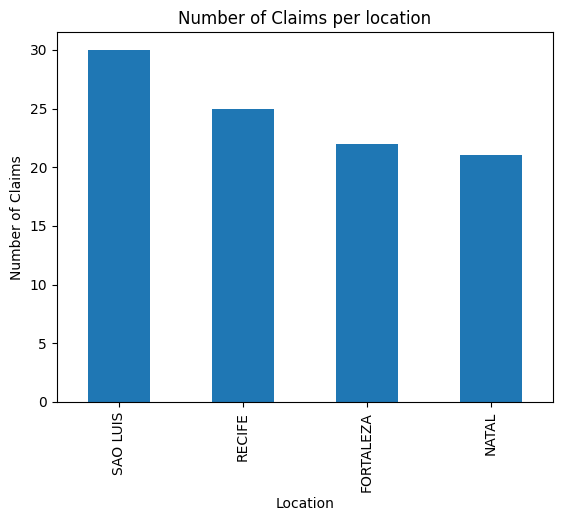

In [18]:
# Create bar chart to display locations by count
claims["Location"].value_counts().plot(kind='bar', title='Number of Claims per location', xlabel = 'Location', ylabel = 'Number of Claims')

We see from the chart that Sao Luis has the most claims followed by Recife, Fortaleza with Natal having the lowest amount of claims. 

### How long does it take to process claims?
Another key business question was:

- What is the distribution of time to close claims?

To answer this question we would need to take the variable "Time to Close" and producing a histogram to seeing how the days it takes to close a case are distributed.

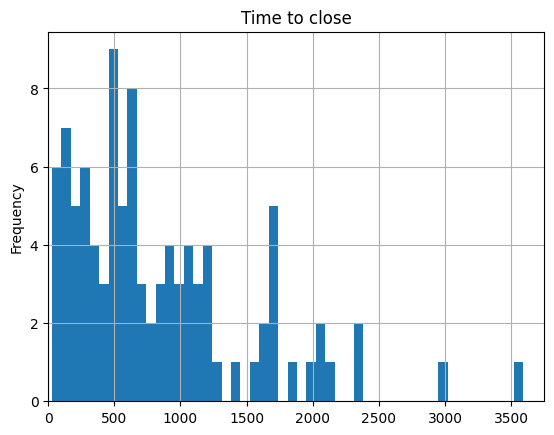

In [19]:
# visualize the distibution of days to process claim
histo_claims = claims["Time to Close"].plot.hist(bins = 50 , grid=True, title="Time to close", xlim=[0, 3750])


From this histogram we can see that the majority of cases across all locations are closed in under 1500 days given that the majority of the occurernces in the chart are on the right side of 1500 days of the histogram.  
Lets investigate further

In [20]:
#Percentage with time to close less that 1500 days
lessthat500 = round(len(claims[claims["Time to Close"] < 500])/len(claims) * 100)
lessthat1000 = round(len(claims[claims["Time to Close"] < 1000])/len(claims) * 100)
lessthat1500 = round(len(claims[claims["Time to Close"] < 1500])/len(claims) * 100)
print("Percentage of case closed in 500 days:", lessthat500)
print("Percentage of case closed in 1000 days:", lessthat1000)
print("Percentage of case closed in 1500 days:", lessthat1500)


Percentage of case closed in 500 days: 38
Percentage of case closed in 1000 days: 68
Percentage of case closed in 1500 days: 83


As we seem from the output confirms that 83% of cases closed within 1500 days we also saw that about 68% are closed within 1000 days.

### Where are claims processed the fastest?

Lastly another business question was:

- How does the average time to close claims differ by location?

To answer this question we must get the get the average of the "Time to Close" and group that by the "Location" variable.

In [21]:
# group the data by location
claims[["Location", "Time to Close"]].groupby(by=["Location"]).mean()

,Time to Close
Location,
FORTALEZA,775.500000
NATAL,581.142857
RECIFE,860.680000
SAO LUIS,1030.066667


 As we can see that most claims are most quickly proceesed in Natal with and average time to close 581 days followed by Fortaleza then Recife with Sao Luis taking the longest time to close a case on average.
 
 Now let this as  visialize this as a bar chart to get a better view of this 

<AxesSubplot:title={'center':'Average time to close of Claims for each location'}, xlabel='Location', ylabel='Avgerage time to close'>

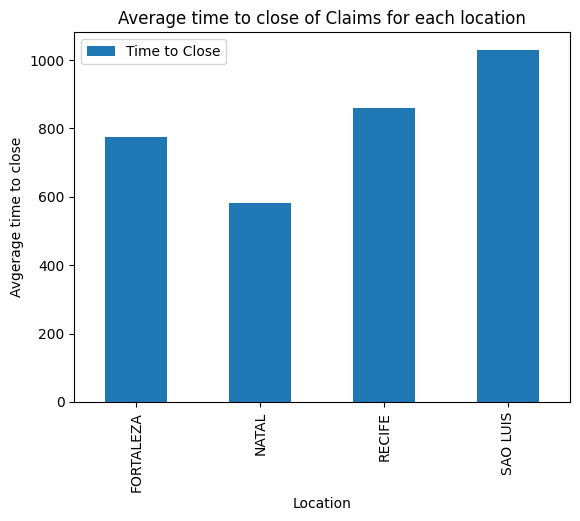

In [22]:
# plot avg time to close by location
claims[["Location", "Time to Close"]].groupby(by=["Location"]).mean().plot(kind='bar', title='Average time to close of Claims for each location', xlabel = 'Location', ylabel = 'Avgerage time to close')


As we can see from this chart claims in Natal are closed on average more quickly followed by Fortaleza and Recife. The location with the longest time to close would be Sao Luis.

# Conclusions

Vivendo is a fast food chain in Brazil with over 200 outlets. As with many fast food
establishments, customers make claims against the company. For example, they blame
Vivendo for suspected food poisoning. 

The legal team, who processes these claims, is currently split across four locations (Recife, Sao Luis, Fortaleza, and Natal) and had questions regarding how claims were processed amongst the organization.

From the data provided on claims lodged against the company we where able to glean insights that would serve beneficial. 

- From the anaylsis we were able to determine that Sao Luis processed the most claims with 30.6% of cases being located there but for the most part cases are generally evenly distributed amongst the three remaining locations.

- We also noted that from reviewing the dataset we were able to determine that the vast majority of the cases (68%) are closed within 1000 days.

- We were able to also note that most claims are most quickly proceesed in Natal with and average time to close 581 days followed by Fortaleza then Recife with Sao Luis taking the longest time to close a case on average.

Finally as the are many more insight we would be able to determine from the dataset we were able to identify a few. In the future I would suggest further analysis could be done on this to determine if the correlations between the variables given in this dataset to find out if there are other factors that could affect processing time.